In [ ]:
using Pkg
Pkg.add(["XLSX", "DataFrames", "Statistics", "Random", "ProgressLogging", "ForwardDiff", "Plots"]) # Installing the necessary packages
using XLSX, DataFrames, Statistics, Random, ProgressLogging, ForwardDiff, Plots



In [ ]:
# Specify the Excel file name
file = "Concrete_Data.xlsx"

# Load the Excel sheet
sheet = XLSX.readtable(file, "Sheet1")

# Create a DataFrame from the sheet
data = DataFrame(sheet)

# Convert all columns to Float64 where possible
for c in names(data)
    try
        data[!, c] = Float64.(data[!, c])
    catch
        # Ignore columns that are not purely numeric (e.g. text columns)
    end
end

# Inspecting the first 5 rows of the dataset
first(data, 5)

In [38]:
rename!(data, [
    "Cement", "Slag", "FlyAsh", "Water", "Superplasticizer",
    "CoarseAgg", "FineAgg", "Age", "Strength"
])

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [39]:
# remove duplicates
data = unique(data)

Row,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.9861
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8874
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.2695
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.0528
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.2961
6,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.0298
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.6983
8,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.4478
9,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.8543


In [40]:
# 1) ENGINEERED FEATURES

println("\n" * "="^50)
println("7️⃣  ENGINEERED FEATURES")
println("="^50)

# Feature 1: Water/Cement ratio
water_cement_ratio = data.Water ./ (data.Cement .+ 1e-10)

# Feature 2: Total Binder
total_binder = data.Cement .+ data.Slag .+ data.FlyAsh

# Feature 3: Total Aggregate
total_aggregate = data.CoarseAgg .+ data.FineAgg

# Feature 4: Binder/Aggregate ratio
binder_aggregate_ratio = total_binder ./ (total_aggregate .+ 1e-10)

# Feature 5: Superplasticizer per binder
superplast_per_binder = data.Superplasticizer ./ (total_binder .+ 1e-10)

# Feature 6: Age (unchanged)
age = data.Age

# Combine engineered features
x_engineered = hcat(
    water_cement_ratio,
    total_binder,
    total_aggregate,
    binder_aggregate_ratio,
    superplast_per_binder,
    age
)

# Normalize engineered features (n × 6)
x_eng_norm = (x_engineered .- mean(x_engineered, dims=1)) ./ std(x_engineered, dims=1)



7️⃣  ENGINEERED FEATURES


1005×6 Matrix{Float64}:
 -1.45514     1.46344    -0.303854    1.24837     -0.719232   -0.280173
 -1.45514     1.46344    -0.157126    1.20542     -0.719232   -0.280173
 -0.22489     0.752461   -2.1624      1.19459     -1.06347     3.51682
 -0.22489     0.752461   -2.1624      1.19459     -1.06347     5.00737
  0.671541   -0.822624    0.555969   -0.818291    -1.06347     4.92892
  0.321889   -0.286658   -1.41898     0.0278219   -1.06347     0.69261
 -0.49828     0.752461   -2.1624      1.19459     -1.06347     5.00737
 -0.49828     0.752461   -2.1624      1.19459     -1.06347    -0.280173
  0.321889   -0.286658   -1.41898     0.0278219   -1.06347    -0.280173
 -0.881026    0.752461   -2.1624      1.19459     -1.06347    -0.280173
  0.671541   -0.822624    0.555969   -0.818291    -1.06347     0.69261
  0.671541   -0.822624    0.555969   -0.818291    -1.06347    -0.280173
 -0.710917    0.752461   -2.1624      1.19459     -1.06347     3.51682
  ⋮                                            

In [41]:
# Normalisieren (Standardisierung)
function standardize(col)
    μ = mean(col)
    σ = std(col)
    return (col .- μ) ./ σ, μ, σ
end

X = Matrix(data[:, 1:8])'
y = data[:, 9]

X_std = similar(X)
μs = Float64[]
σs = Float64[]

for j in 1:size(X,1)
    col, μ, σ = standardize(X[j, :])
    X_std[j,:] = col
    push!(μs, μ)
    push!(σs, σ)
end

In [42]:

# 3) ENGINEERED + ORIGINAL FEATURES KOMBINIEREN


# Engineered features transponieren → (6 × n)
x_eng_t = x_eng_norm'

# Merge: jetzt (14 × n)
X_all = vcat(X_std, x_eng_t)

# Set correct inputsize
inputsize = size(X_all, 1)   # = 14
hiddensize = 10
outputsize = 1

1

In [43]:

# 4) TRAIN/TEST SPLIT


Random.seed!(123)
n = size(X_all, 2)
idx = shuffle(1:n)

train_idx = idx[1:floor(Int, 0.8n)]
test_idx  = idx[floor(Int, 0.8n)+1:end]

Xtrain = X_all[:, train_idx]
ytrain = y[train_idx]

Xtest  = X_all[:, test_idx]
ytest  = y[test_idx]

201-element Vector{Float64}:
 47.8151606
 40.7135578
 67.79617508
 66.82401392
 64.90037588
 45.3675208
 32.109882284729316
 34.23937816
 22.435549039999998
 17.96429718
 45.2985732
 33.419591196
 13.461329424
  ⋮
 38.99676256
 20.593958644
 59.89478012
 17.54026944
 39.700028079999996
 32.66047812
  8.374375495999999
 29.231713971999998
 56.63355864
 26.94472208
 61.09446836
 55.064311264

In [44]:
function mse(ŷ, y)
    mean((ŷ .- y).^2)
end

mse (generic function with 1 method)

In [45]:
function relu(x)
    return max(0,x)
end

relu (generic function with 1 method)

In [46]:
function pack_params(w1, b1, w2, b2)
    return vcat(vec(w1), b1, vec(w2), b2)
end

function unpack_params(p, inputsize, hiddensize, outputsize)
    len_w1 = hiddensize * inputsize
    len_b1 = hiddensize
    len_w2 = outputsize * hiddensize
    len_b2 = outputsize

    w1 = reshape(p[1:len_w1], hiddensize, inputsize)
    b1 = p[len_w1+1:len_w1+len_b1]

    offset = len_w1 + len_b1
    w2 = reshape(p[offset+1:offset+len_w2], outputsize, hiddensize)
    b2 = p[offset+len_w2+1:end]

    return w1, b1, w2, b2
end

unpack_params (generic function with 1 method)

In [47]:
function twolayer_regression(x, p)
    w1, b1, w2, b2 = unpack_params(p, size(x,1), 10, 1)
    z1 = w1 * x .+ b1
    a1 = relu.(z1)
    z2 = w2 * a1 .+ b2
    return z2[:]
end

twolayer_regression (generic function with 1 method)

In [48]:
function train!(modelf, errf, p::Vector, x, y, η, nsteps)
    e(p) = errf(modelf(x, p), y)
    for i in 1:nsteps
        g = ForwardDiff.gradient(e, p)
        p .-= η .* g
    end
    return p
end

train! (generic function with 1 method)

In [49]:
w1 = rand(hiddensize, inputsize) .- 0.5
b1 = rand(hiddensize) .- 0.5
w2 = rand(outputsize, hiddensize) .- 0.5
b2 = rand(outputsize) .- 0.5

p = pack_params(w1, b1, w2, b2)

161-element Vector{Float64}:
 -0.16227367118590275
 -0.28006038081345874
 -0.41736313757177246
  0.21072488029134728
  0.3487078638946295
  0.35665214846952453
  0.38389508205359724
  0.04375979775515282
  0.06657622405497743
  0.39347136295080554
  0.16901802049538273
  0.4428856666956238
 -0.3179340023621551
  ⋮
  0.13168024929540767
 -0.10854328684667969
  0.20260493343094643
  0.30277803858919594
  0.2533905149044333
  0.30252857359218077
  0.2670588077408932
 -0.49901037166985973
 -0.47181361949642286
 -0.2988102185973617
  0.13547038991196458
  0.4615555668846444

In [50]:
η = 0.001
nsteps = 5000

p_trained = train!(
    twolayer_regression,
    mse,
    p,
    Xtrain,
    ytrain,
    η,
    nsteps
)


161-element Vector{Float64}:
  0.36750390018763157
 -0.7210154553381567
 -1.15567879417931
 -0.01959313705704155
  0.35619909714212455
  0.3955793230911644
  0.027490011054374056
 -0.1040692730978636
  1.014029326367458
  0.9018831861823798
  0.5348078737222248
  0.6136298023737423
  0.2771656650655463
  ⋮
  1.3341871905031335
  3.2652400036369533
  1.4093750431804724
  2.4041481774272553
  5.927245486387359
  2.506640274522528
  1.4000595162323461
 -5.177972037913259
 -2.3946458524226246
 -3.4932158319374507
  2.9499582899374914
  2.730790781077732

In [51]:
y_pred_test = twolayer_regression(Xtest, p_trained)

201-element Vector{Float64}:
 46.297176532607644
 36.627748225899914
 68.03940552192621
 54.65398611329555
 65.4548908966663
 55.95325444315074
 34.5305777499678
 24.36994727981533
 25.341999135693687
 22.574635378251624
 49.67729778815268
 40.61202147614775
 18.690562664183606
  ⋮
 37.37399464622433
 21.051068049382735
 66.16440209239359
 16.29416192731295
 37.582461108180766
 33.156156075692785
  9.575312808436866
 33.52438939742789
 53.65020904024698
 28.78041641656514
 59.68781015615461
 43.704946322221396

In [52]:
test_mse = mse(y_pred_test, ytest)
test_rmse = sqrt(test_mse)

println("Test MSE  = $test_mse")
println("Test RMSE = $test_rmse")

Test MSE  = 36.9674337970103
Test RMSE = 6.080085015607126


In [53]:
mae = mean(abs.(y_pred_test .- ytest))
println("Test MAE = $mae")

Test MAE = 4.6954080217489595


In [54]:
# R²-Berechnung
ss_res = sum((ytest .- y_pred_test).^2)
ss_tot = sum((ytest .- mean(ytest)).^2)

r2 = 1 - ss_res / ss_tot

println("R² = $r2")

R² = 0.861635595107866


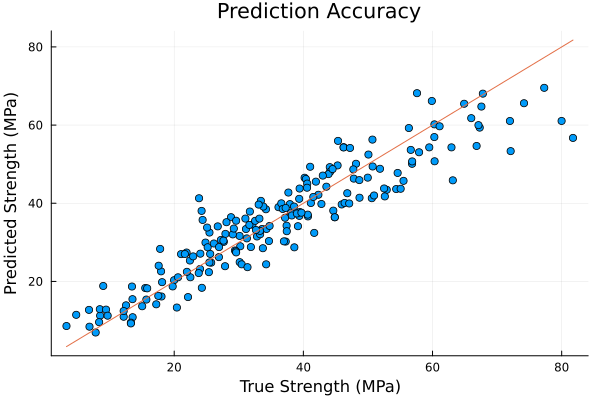

In [55]:
scatter(ytest, y_pred_test,
    xlabel="True Strength (MPa)",
    ylabel="Predicted Strength (MPa)",
    title="Prediction Accuracy",
    legend=false)
plot!(identity, label="Ideal fit")

In [56]:
# --- Training Predictions ---
y_pred_train = twolayer_regression(Xtrain, p_trained)

# --- Training MSE ---
train_mse = mse(y_pred_train, ytrain)

# --- Training RMSE ---
train_rmse = sqrt(train_mse)

# --- Training MAE ---
train_mae = mean(abs.(y_pred_train .- ytrain))

# --- Training R2 ---
ss_res_train = sum((ytrain .- y_pred_train).^2)
ss_tot_train = sum((ytrain .- mean(ytrain)).^2)
train_r2 = 1 - ss_res_train / ss_tot_train

println("Train MSE  = $train_mse")
println("Train RMSE = $train_rmse")
println("Train MAE  = $train_mae")
println("Train R²   = $train_r2")

Train MSE  = 29.885190758735334
Train RMSE = 5.466734926693934
Train MAE  = 4.189550327874641
Train R²   = 0.8867945209628353


In [57]:
function r2_score(ŷ, y)
    ss_res = sum((y .- ŷ).^2)
    ss_tot = sum((y .- mean(y)).^2)
    return 1 - ss_res/ss_tot
end

r2_score (generic function with 1 method)

In [58]:
function kfold_cv_r2(X, y; K=5, η=0.001, nsteps=2000, hiddensize=10)
    n = size(X, 2)
    idx = shuffle(1:n)
    fold_size = floor(Int, n / K)

    r2_scores = Float64[]

    for k in 1:K
        # Folds definieren
        val_start = (k-1)*fold_size + 1
        val_end   = k == K ? n : k*fold_size
        val_idx   = idx[val_start:val_end]
        train_idx = setdiff(idx, val_idx)

        Xtrain = X[:, train_idx]
        ytrain = y[train_idx]
        Xval   = X[:, val_idx]
        yval   = y[val_idx]

        # Parameter neu initialisieren
        inputsize = size(X,1)
        outputsize = 1

        w1 = rand(hiddensize, inputsize) .- 0.5
        b1 = rand(hiddensize) .- 0.5
        w2 = rand(outputsize, hiddensize) .- 0.5
        b2 = rand(outputsize) .- 0.5
        p = pack_params(w1, b1, w2, b2)

        # Trainieren
        p_trained = train!(
            twolayer_regression, mse, p,
            Xtrain, ytrain, η, nsteps
        )

        # R² berechnen
        ŷ_val = twolayer_regression(Xval, p_trained)
        push!(r2_scores, r2_score(ŷ_val, yval))
    end

    return r2_scores, mean(r2_scores)
end

kfold_cv_r2 (generic function with 1 method)

In [59]:
# --- Cross Validation ausführen ---
r2_scores, r2_mean = kfold_cv_r2(X_std, y; K=5, η=0.001, nsteps=3000)

println("R² Scores pro Fold: ", r2_scores)
println("Durchschnittliches R²: ", r2_mean)

R² Scores pro Fold: [0.8238287988933854, 0.8395803509025523, 0.8016211110207898, 0.8359525912782851, 0.798282367260223]
Durchschnittliches R²: 0.8198530438710472
